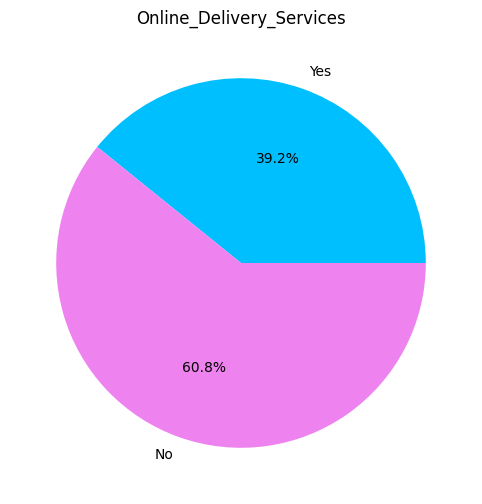

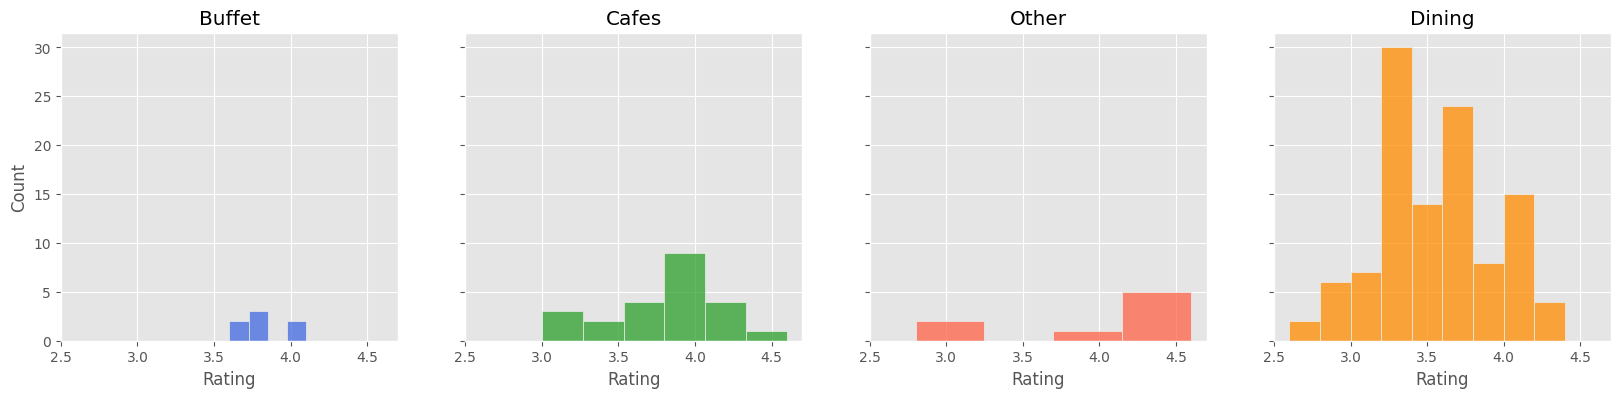

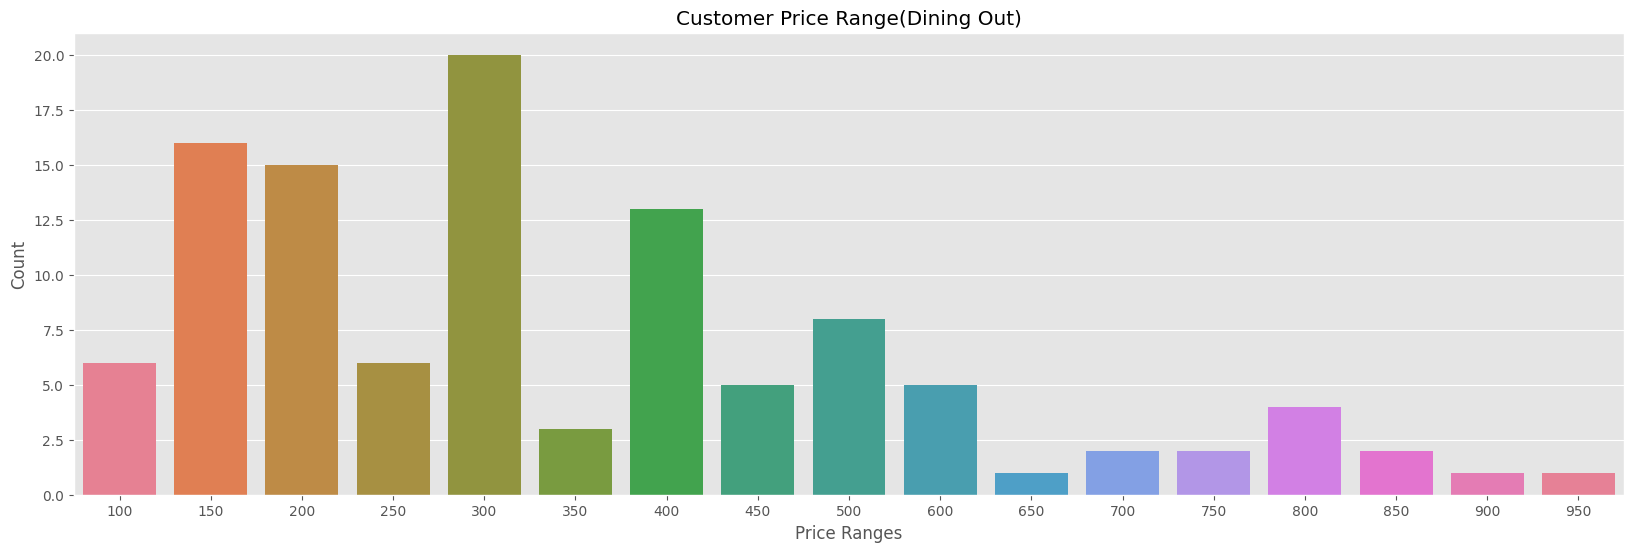

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator as ML , ScalarFormatter as SF
from collections import Counter
import itertools as iter

zamato_csv = pd.read_csv(r'F:\Documents\Datacamp\Associate Data Analysis Python Datacamp\GeeksForGeeks Data Analysis Projects\Zomato Dataset\Zomato-data-.csv')

zamato_df = pd.DataFrame(zamato_csv)


# Questions to be answered: 

# Do more restaurants provide online delivery compared to offline services?

# Which types of restaurants are most favored by the general public?

# What price range do couples prefer for dining out?

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Question 1

# Do more restaurants provide online delivery compared to offline services?
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

labels = []
sizes = []

color_palette = ['deepskyblue', 'violet' ]

percent = Counter(zamato_df['online_order']) # Counting the Yes and No confirmation for online order services. 

for label , size in percent.items():
    labels.append(label)
    sizes.append(size)

fig, ax = plt.subplots(1,1, figsize = (10,6))

ax.pie(sizes,labels=labels , autopct='%1.1f%%' , colors=color_palette)
ax.set_title('Online_Delivery_Services')

plt.show()

# Answer: No most restaurants do not provide online deliveries. 

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Question 2

# Which types of restaurants are most favored by the general public?


#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#print(zamato_df.dtypes)
#print(zamato_df['listed_in(type)'].unique())


zamato_df['integer_rating'] = zamato_df['rate'].str.slice(0,3).astype(float)

buffet_df = zamato_df[zamato_df['listed_in(type)'] == 'Buffet']
cafes_df = zamato_df[zamato_df['listed_in(type)'] == 'Cafes']
other = zamato_df[zamato_df['listed_in(type)'] == 'other']
dining_df = zamato_df[zamato_df['listed_in(type)']== 'Dining']

plt.style.use('ggplot')
fig, ax = plt.subplots(1,4, figsize = (20,4) , sharex= True, sharey= True)

sns.histplot(buffet_df, x=buffet_df['integer_rating'], ax=ax[0], color='royalblue')
sns.histplot(cafes_df, x=cafes_df['integer_rating'], ax=ax[1], color='tab:green')
sns.histplot(other, x=other['integer_rating'], ax=ax[2], color='tomato')
sns.histplot(dining_df,x=dining_df['integer_rating'], ax=ax[3], color='darkorange')

ax[0].set_title('Buffet')
ax[1].set_title('Cafes')
ax[2].set_title('Other')
ax[3].set_title('Dining')

ax[0].set_xlabel('Rating')
ax[1].set_xlabel('Rating')
ax[2].set_xlabel('Rating')
ax[3].set_xlabel('Rating')

plt.show()

# Answer : The Dining Type for restaurants

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Question 3

# What price range do couples prefer for dining out?

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


price_range = []
count = []

dining_out_pr = zamato_df[zamato_df['listed_in(type)'] == 'Dining']

price_counts = Counter(dining_out_pr['approx_cost(for two people)'])

for x, y in price_counts.items():
    price_range.append(x)
    count.append(y)


list_of_tuples = list(zip(price_range,count))

restaurant_pr = pd.DataFrame(list_of_tuples, columns=['price_range', 'count'])

#print(sns.color_palette('husl',18).as_hex())

#sns_colors = [x for x in sns.color_palette('husl',18).as_hex()] ----------- This piece of code for acquiring the color codes in hex format......


fig, ax = plt.subplots(1,1,figsize = (20,6))

sns.barplot(restaurant_pr, x= restaurant_pr['price_range'], y= restaurant_pr['count'], hue= restaurant_pr['price_range'], legend= False , palette='husl', ax=ax)

ax.set_title('Customer Price Range(Dining Out)')
ax.set_xlabel('Price Ranges')
ax.set_ylabel('Count')

plt.show()


# Answer: Preferred price range are the following : 150 , 200 , 300 and 400